<a href="https://colab.research.google.com/github/ernie-Griffiths/Determining-the-Validity-of-Genetically-Engineered-Crops-in-a-Warming-Climate-Using-Machine-Learning/blob/main/Cleaned_Data_Exploration_and_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 100)

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
Phenotype_Soil_Weather_Data = pd.read_csv("/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Finalised data/Phenotype_Soil_Weather_Data_Cleaned.csv",index_col=[0])

In [ ]:
Phenotype_Soil_Weather_Data[["Family","Field-Location","Plant Height [cm]","1:1 Soil pH","Temperature [C]","Texture"]].sample(n=4)

,Family,Field-Location,Plant Height [cm],1:1 Soil pH,Temperature [C],Texture
484,PHW65_MOG,DEH1,248.0,6.6,23.041976,Loamy Sand
8059,PHW65_MOG,OHH1,249.0,6.6,20.803158,Clay
5662,MO44_PHW65,MNH1,253.0,6.3,14.354844,Clay Loam
967,PHN11_PHW65,GAH1,165.0,6.6,24.276099,Loamy Sand


In [ ]:
len(Phenotype_Soil_Weather_Data.columns)

64

In [ ]:
Phenotype_Soil_Weather_Data.count()

Field-Location                         10212
Plot length (center-center in feet)    10212
Plot area (ft2)                        10212
Alley length (in inches)               10212
Row spacing (in inches)                10212
Rows per plot                          10212
Kernels/Packet                         10212
# Seed per plot                        10212
Source                                  9280
Pedigree                               10212
Family                                 10185
Tester                                  9347
Replicate                              10212
Block                                  10212
Plot                                   10212
Range                                  10208
Pass                                   10210
Anthesis [MM/DD/YY]                     9411
Silking [MM/DD/YY]                      9484
Anthesis [days]                         9411
Silking [days]                          9484
Plant Height [cm]                      10203
Ear Height

through exploration of this dataset, it was determined that the value that would need to be correlated is the divisible combination of the grain yeild at the end of the season, amount of seeds planted a the start of the season, this is called the seed success factor.

In [ ]:
Phenotype_Soil_Weather_Data["Seed Success factor"] = Phenotype_Soil_Weather_Data["Grain Yield (bu/A)"] / Phenotype_Soil_Weather_Data["# Seed per plot"]

In [ ]:
Phenotype_Soil_Weather_Data.describe()


,Plot length (center-center in feet),Plot area (ft2),Alley length (in inches),Row spacing (in inches),Rows per plot,Kernels/Packet,# Seed per plot,Replicate,Block,Plot,Range,Pass,Anthesis [days],Silking [days],Plant Height [cm],Ear Height [cm],Stand Count [# of plants],Grain Moisture [%],Test Weight [lbs],Plot Weight [lbs],Grain Yield (bu/A),Plant Month,Harvest Month,E Depth,1:1 Soil pH,WDRF Buffer pH,1:1 S Salts mmho/cm,Texture No,Organic Matter LOI %,Nitrate-N ppm N,lbs N/A,Potassium ppm K,Sulfate-S ppm S,Calcium ppm Ca,Magnesium ppm Mg,Sodium ppm Na,CEC/Sum of Cations me/100g,%H Sat,%K Sat,%Ca Sat,%Mg Sat,%Na Sat,Mehlich P-III ppm P,% Sand,% Silt,% Clay,Temperature [C],Dew Point [C],Relative Humidity [%],Solar Radiation [W/m2],Rainfall [mm],Wind Speed [m/s],Wind Direction [degrees],Wind Gust [m/s],Soil Temperature [C],Seed Success factor
count,10212.000000,10212.000000,10212.000000,10212.000000,10212.0,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10208.000000,10210.000000,9411.000000,9484.000000,10203.000000,10202.000000,10198.000000,10212.000000,9016.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,8988.000000,10212.000000,10212.000000,10212.000000,10212.000000,9714.000000,10212.000000
mean,19.641254,81.875991,40.867411,30.299060,2.0,65.271641,82.143948,1.502252,4.136506,395.343517,12.510678,31.882272,65.305600,66.424188,220.973053,104.981574,63.798686,20.953447,57.212545,19.717139,173.899996,4.957893,10.179201,10.582452,6.896269,7.036291,0.214612,1.906189,3.135605,24.651919,77.758030,183.803467,10.915550,2371.176655,327.330689,12.462985,16.150725,5.907266,3.909714,72.610165,16.900803,0.339796,52.185174,46.919017,26.146592,26.934391,18.842203,12.215246,71.801596,215.632578,0.044162,1.046552,182.775773,5.394304,20.330659,2.125319
std,2.451373,11.670484,12.926218,1.305791,0.0,21.797756,7.637580,0.500019,2.676201,318.733917,8.964529,28.107082,6.833538,6.862615,28.020419,24.091295,13.109775,6.942292,5.104080,6.103918,48.819790,1.022990,1.353424,2.061240,0.731483,0.253645,0.113186,0.291580,1.537912,13.058782,45.772608,145.465638,5.718218,1317.968329,227.471601,6.081780,8.472119,10.744635,3.017248,12.398237,6.903723,0.569257,40.650194,19.203323,11.388096,9.839661,4.497012,4.061032,2.179074,40.116577,0.020061,0.826067,31.957636,6.045355,5.393718,0.619933
min,15.000000,62.500000,29.000000,30.000000,2.0,35.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,48.000000,93.000000,30.000000,6.000000,6.890000,26.800000,1.320000,12.418756,3.000000,8.000000,6.000000,5.700000,6.600000,0.080000,1.000000,0.600000,2.000000,7.000000,55.000000,4.200000,394.000000,34.000000,6.000000,2.500000,0.000000,1.000000,43.000000,6.000000,0.000000,5.000000,18.000000,7.000000,9.000000,13.466197,5.232939,66.901847,159.231589,0.004220,0.225620,102.241919,0.013121,6.220000,0.172483
25%,17.500000,70.000000,30.000000,30.000000,2.0,40.000000,80.000000,1.000000,2.000000,166.000000,6.000000,12.000000,60.000000,62.000000,200.000000,90.000000,54.000000,14.850000,53.800000,16.452550,144.546780,5.000000,9.000000,8.000000,6.300000,6.800000,0.127500,2.000000,2.400000,15.800000,55.000000,84.000000,6.200000,1895.000000,161.000000,8.000000,12.100000,0.000000,1.000000,62.000000,11.000000,0.000000,11.000000,38.000000,20.000000,22.000000,14.354844,7.914164,70.631504,192.038883,0.028662,0.371963,155.748250,2.330184,14.801403,1.708302
50%,19.685000,84.000000,36.000000,30.000000,2.0,80.000000,80.000000,2.000000,4.000000,329.000000,11.000000,22.000000,65.000000,67.000000,221.500000,108.000000,64.000000,21.100000,56.200000,19.890000,179.008213,5.000000,11.000000,12.000000,6.600000,7.200000,0.210000,2.

As this was a combination of two of the columns they are excluded from the Pearson correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


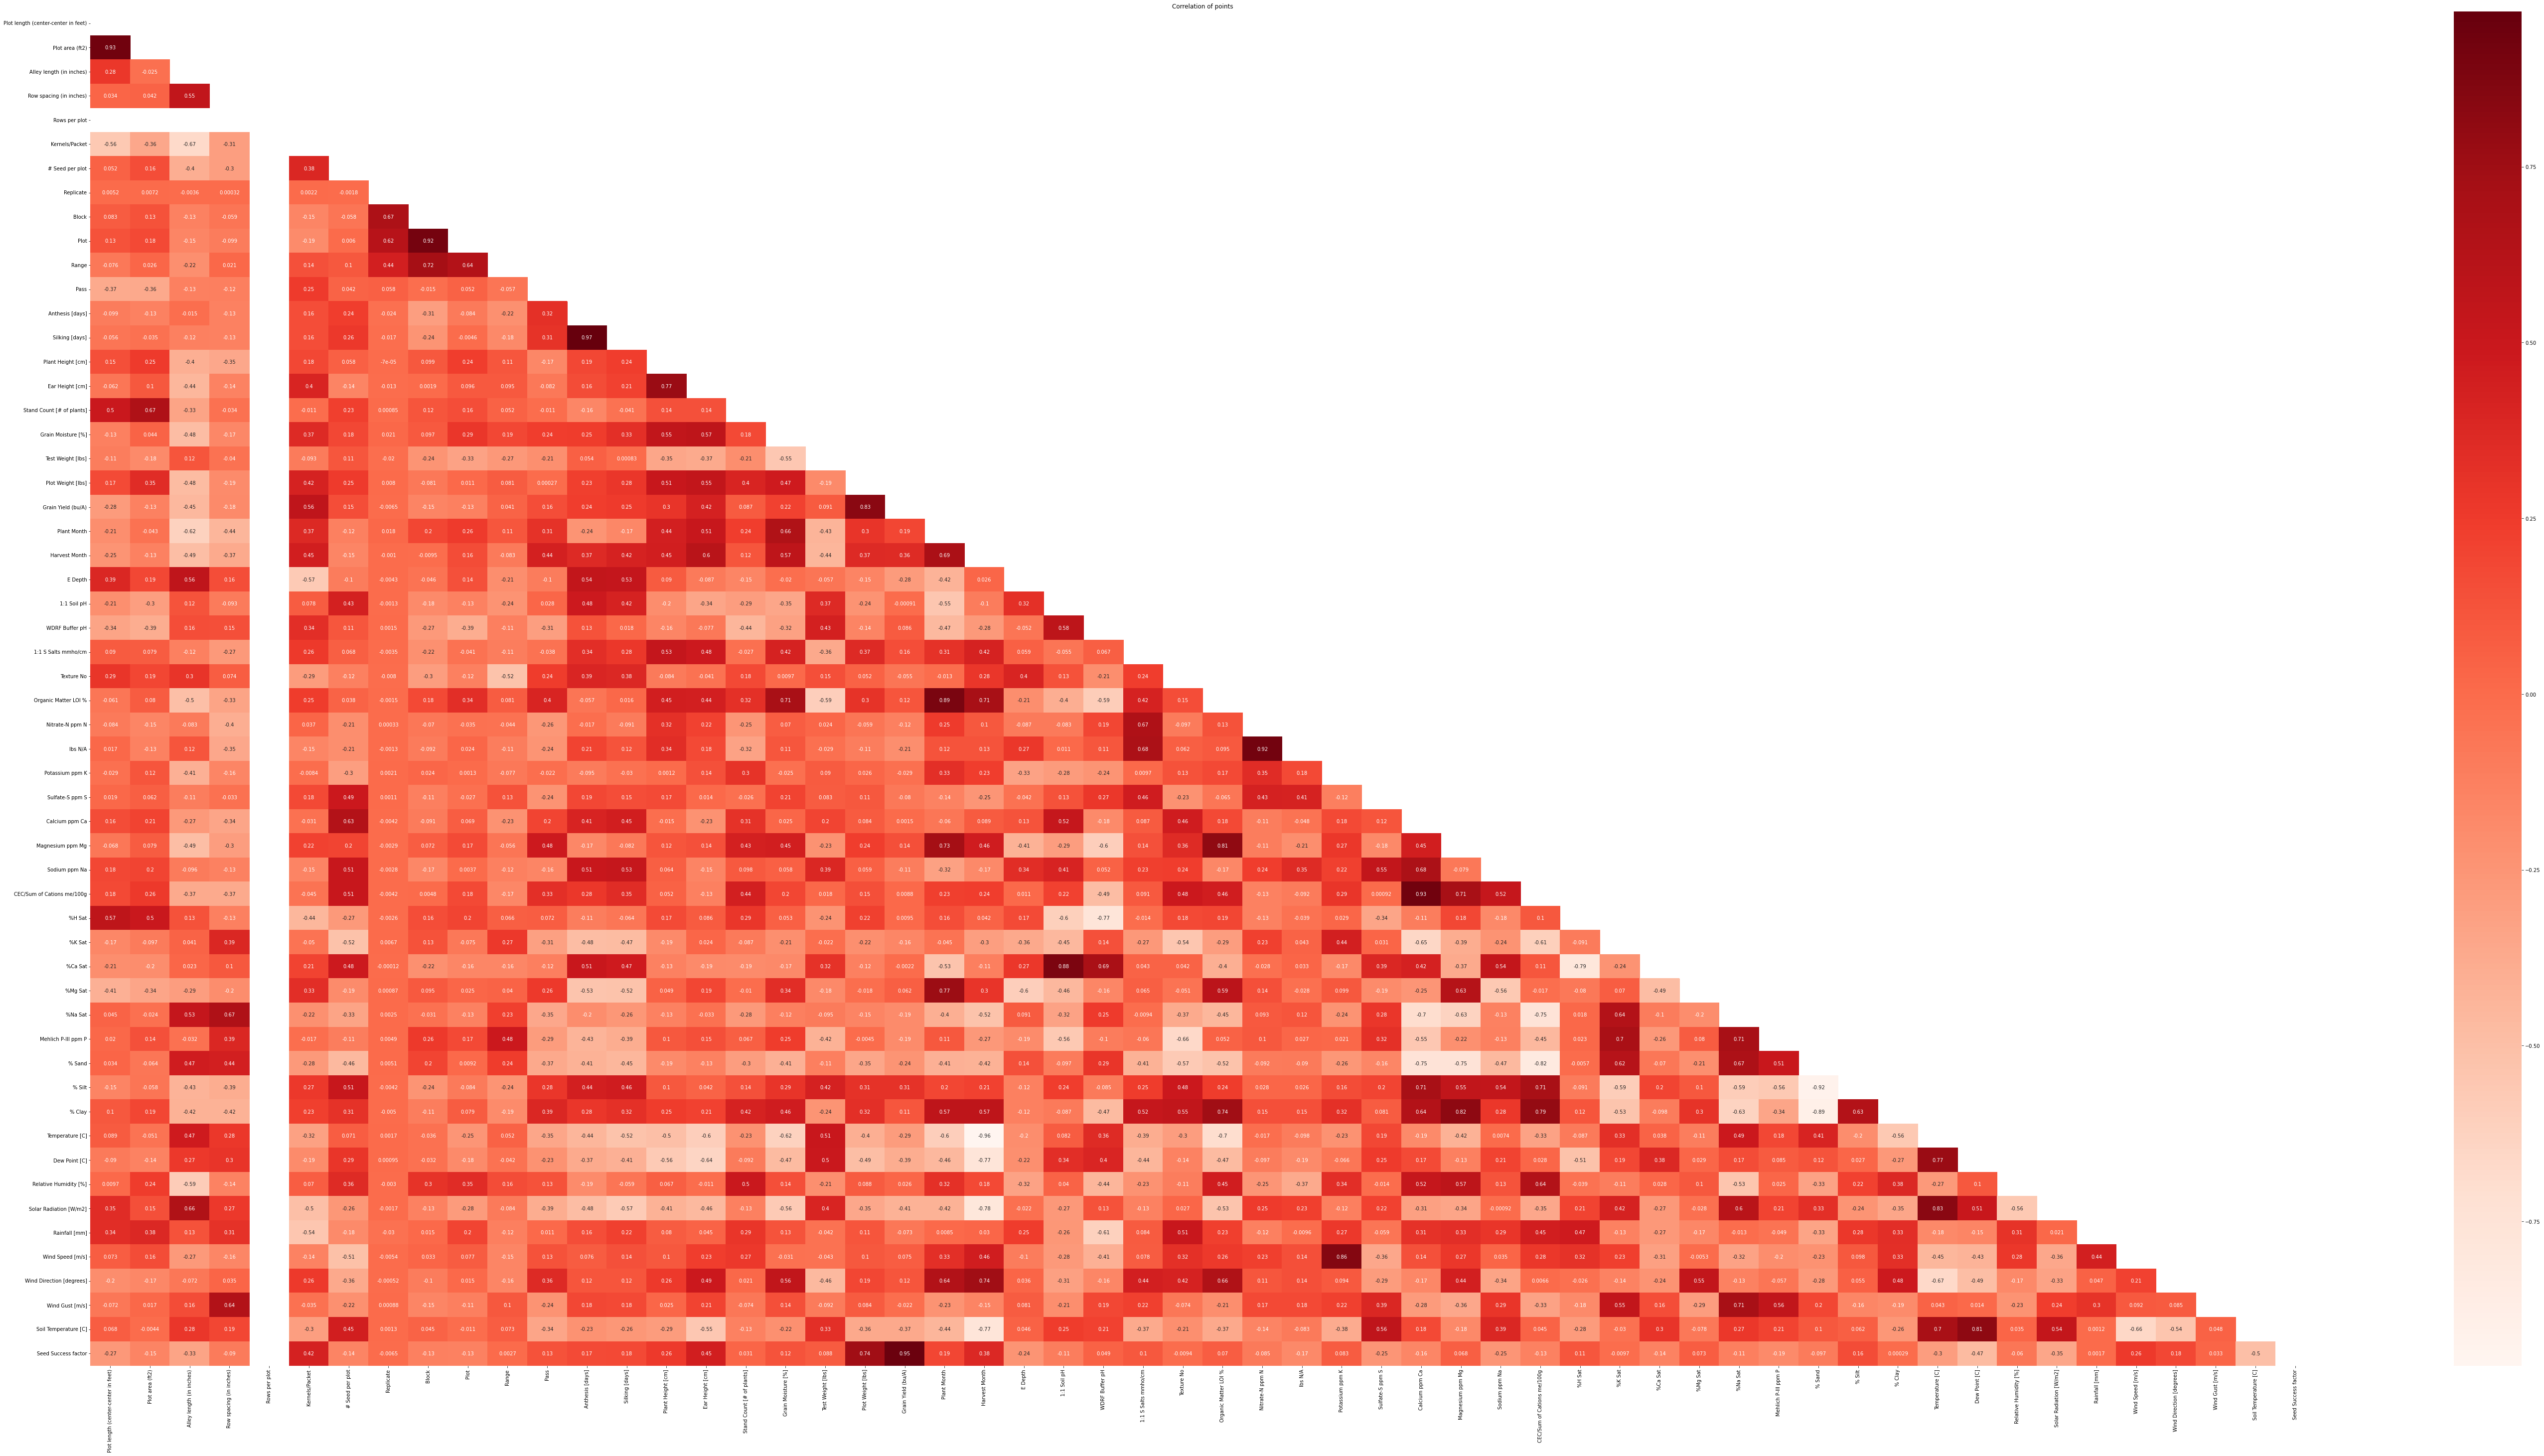

,Seed Success factor
Seed Success factor,1.000000
Grain Yield (bu/A),0.950748
Plot Weight [lbs],0.744883
Ear Height [cm],0.445914
Kernels/Packet,0.423852
Harvest Month,0.382150
Plant Height [cm],0.262677
Wind Speed [m/s],0.258425
Plant Month,0.190754
Wind Direction [degrees],0.181608


In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(100,50))
mask = np.triu(np.ones_like(Phenotype_Soil_Weather_Data.corr(), dtype=np.bool))
cor = Phenotype_Soil_Weather_Data.corr()
sns.heatmap(cor,mask=mask, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation of points')
plt.show()
Phenotype_Soil_Weather_Data.corr()[['Seed Success factor']].sort_values(by='Seed Success factor', ascending=False)

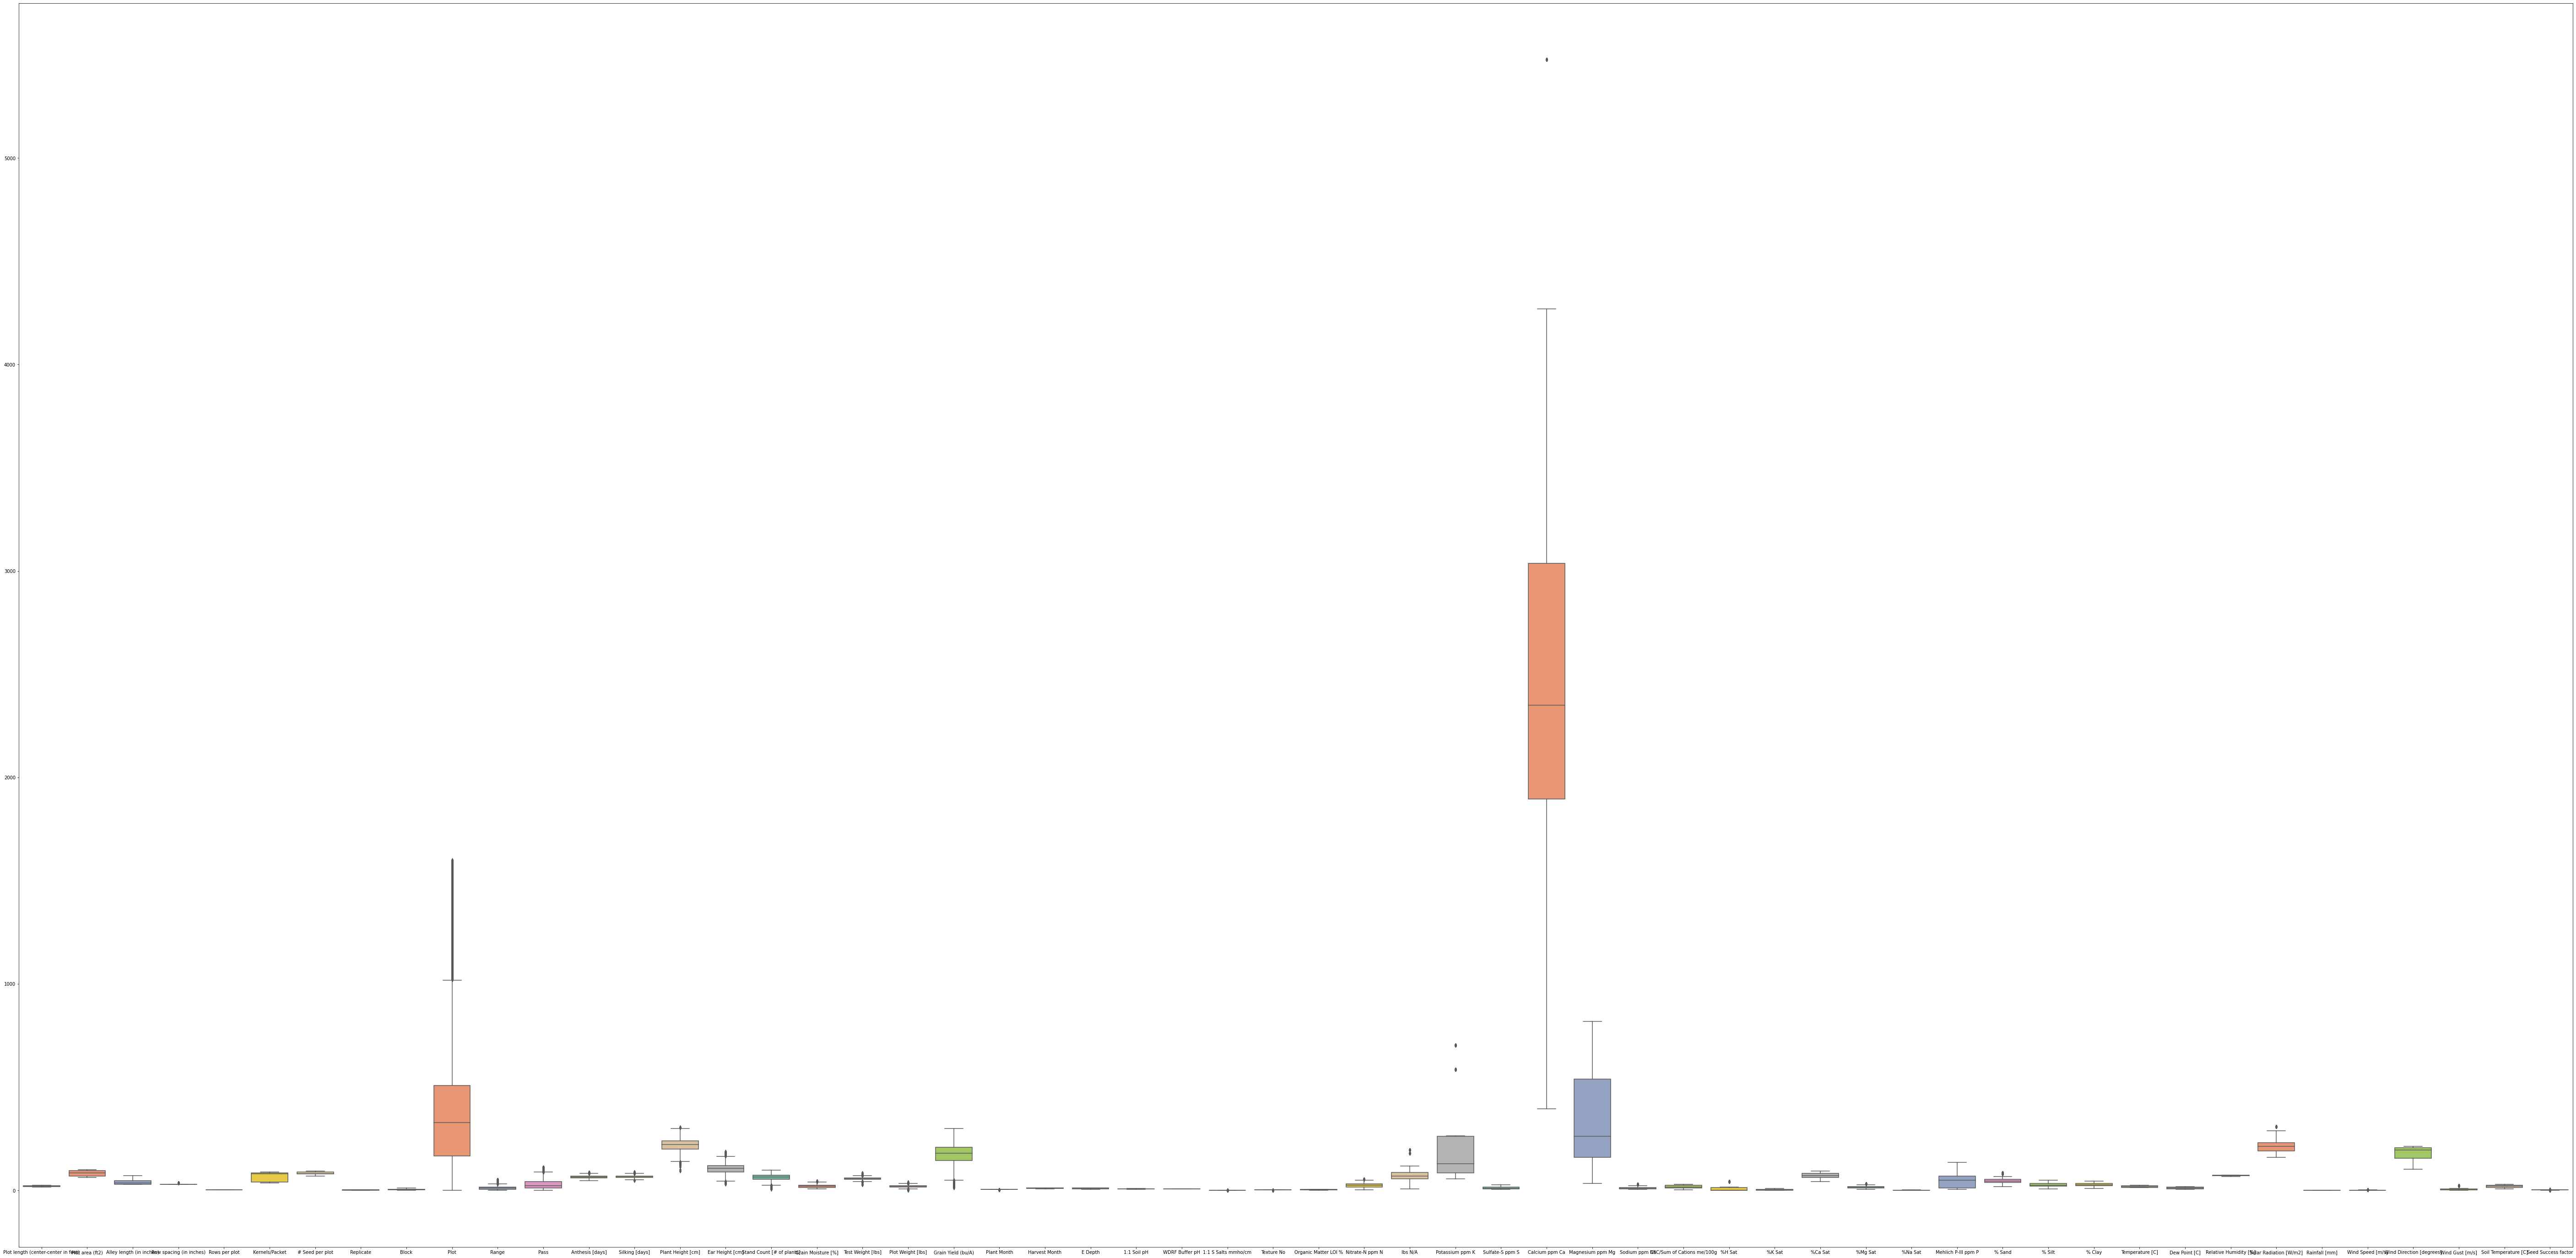

In [ ]:
plt.figure(figsize=(100,50))
sns.boxplot(data=Phenotype_Soil_Weather_Data, orient="v", palette="Set2")
plt.show()

As the success factor of a particular plant, is the result of the amount of inital seeds and then the grain yeild at the end of the harvest season, more columns can be removed to further finetune the variables that will be used within machine learning algorithums.

This is a general start to the feature selection, as there will be more based on the particular machine learning algorithums that will be put in place.

This is also done to finetune the attributes that we are trying to use to predict the success of a plant.

In [ ]:
FeatureSelected_Phenotype_Soil_Weather_Data = Phenotype_Soil_Weather_Data.drop(['Grain Yield (bu/A)','Kernels/Packet','Plot Weight [lbs]','Rows per plot','Row spacing (in inches)','Alley length (in inches)','Plot length (center-center in feet)','Plot area (ft2)','Plot','# Seed per plot'] , axis = 1)

In [ ]:
FeatureSelected_Phenotype_Soil_Weather_Data

,Field-Location,Source,Pedigree,Family,Tester,Replicate,Block,Range,Pass,Anthesis [MM/DD/YY],Silking [MM/DD/YY],Anthesis [days],Silking [days],Plant Height [cm],Ear Height [cm],Stand Count [# of plants],Grain Moisture [%],Test Weight [lbs],Plant Month,Harvest Month,Location,E Depth,1:1 Soil pH,WDRF Buffer pH,1:1 S Salts mmho/cm,Texture No,Organic Matter LOI %,Nitrate-N ppm N,lbs N/A,Potassium ppm K,Sulfate-S ppm S,Calcium ppm Ca,Magnesium ppm Mg,Sodium ppm Na,CEC/Sum of Cations me/100g,%H Sat,%K Sat,%Ca Sat,%Mg Sat,%Na Sat,Mehlich P-III ppm P,% Sand,% Silt,% Clay,Texture,Temperature [C],Dew Point [C],Relative Humidity [%],Solar Radiation [W/m2],Rainfall [mm],Wind Speed [m/s],Wind Direction [degrees],Wind Gust [m/s],Soil Temperature [C],Seed Success factor
0,DEH1,WIPV17/30359,PHN11_PHW65_0512/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,2.0,7/2/2019,7/2/2019,54.0,54.0,274.0,117.0,60.0,20.00,57.200,5.0,9.0,DEH1,8.0,6.6,7.2,0.13,1.0,2.4,28.6,69.0,125.0,15.0,487.0,75.0,8.0,3.4,0.0,9.0,71.0,18.0,1.0,136.0,81.0,9.0,10.0,Loamy Sand,23.041976,13.951074,72.528273,212.490939,0.012235,0.225620,141.449484,6.775455,23.818260,1.524510
1,DEH1,WIPV17/30278,PHN11_PHW65_0278/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,3.0,7/2/2019,7/2/2019,54.0,54.0,251.0,121.0,58.0,19.50,54.500,5.0,9.0,DEH1,8.0,6.6,7.2,0.13,1.0,2.4,28.6,69.0,125.0,15.0,487.0,75.0,8.0,3.4,0.0,9.0,71.0,18.0,1.0,136.0,81.0,9.0,10.0,Loamy Sand,23.041976,13.951074,72.528273,212.490939,0.012235,0.225620,141.449484,6.775455,23.818260,2.057006
2,DEH1,WIPV17/30949,PHN11_PHW65_0464/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,4.0,7/2/2019,7/1/2019,54.0,53.0,249.0,125.0,58.0,19.90,58.600,5.0,9.0,DEH1,8.0,6.6,7.2,0.13,1.0,2.4,28.6,69.0,125.0,15.0,487.0,75.0,8.0,3.4,0.0,9.0,71.0,18.0,1.0,136.0,81.0,9.0,10.0,Loamy Sand,23.041976,13.951074,72.528273,212.490939,0.012235,0.225620,141.449484,6.775455,23.818260,1.295141
3,DEH1,WIPV17/30852,PHN11_PHW65_0212/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,5.0,7/2/2019,7/2/2019,54.0,54.0,234.0,114.0,61.0,19.90,58.700,5.0,9.0,DEH1,8.0,6.6,7.2,0.13,1.0,2.4,28.6,69.0,125.0,15.0,487.0,75.0,8.0,3.4,0.0,9.0,71.0,18.0,1.0,136.0,81.0,9.0,10.0,Loamy Sand,23.041976,13.951074,72.528273,212.490939,0.012235,0.225620,141.449484,6.775455,23.818260,1.757691
4,DEH1,NaN,F42/H95,Yellow Stripe,NaN,1.0,1,2.0,6.0,7/5/2019,7/6/2019,57.0,58.0,254.0,117.0,46.0,20.20,57.100,5.0,9.0,DEH1,8.0,6.6,7.2,0.13,1.0,2.4,28.6,69.0,125.0,15.0,487.0,75.0,8.0,3.4,0.0,9.0,71.0,18.0,1.0,136.0,81.0,9.0,10.0,Loamy Sand,23.041976,13.951074,72.528273,212.490939,0.012235,0.225620,141.449484,6.775455,23.818260,2.695785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10207,TXH2,17SGTF:LH195:0008,MO44_PHW65_0160/LH195,MO44_PHW65,LH195,2.0,6,16.0,6.0,5/28/19,5/28/19,69.0,69.0,206.0,61.0,50.0,11.43,62.083,3.0,8.0,TXH2,12.0,8.4,7.2,0.13,2.0,1.1,15.8,57.0,172.0,6.2,5476.0,230.0,23.0,29.8,0.0,1.0,92.0,6.0,0.0,11.0,38.0,34.0,28.0,Clay Loam,24.761555,18.790331,72.257038,231.512891,0.047307,0.612856,139.331982,3.777161,30.027183,1.567523
10208,TXH2,17SGTF:LH195:1426,MO44_PHW65_0175/LH195,MO44_PHW65,LH195,2.0,6,16.0,5.0,5/26/19,5/26/19,67.0,67.0,180.0,48.0,44.0,17.14,61.728,3.0,8.0,TXH2,12.0,8.4,7.2,0.13,2.0,1.1,15.8,57.0,172.0,6.2,5476.0,230.0,23.0,29.8,0.0,1.0,92.0,6.0,0.0,11.0,38.0,34.0,28.0,Clay Loam,24.761555,18.790331,72.257038,231.512891,0.047307,0.612856,139.331982,3.777161,30.027183,1.133515
10209,TXH2,17SGTF:LH195:1485,MO44_PHW65_0433/LH195,MO44_PHW65,LH195,2.0,6,16.0,4.0,5/28/19,5/28/19,69.0,69.0,216.0,71.0,67.0,9.29,60.301,3.0,8.0,TXH2,12.0,8.4,7.2,0.13,2.0,1.1,15.8,57.0,172.0,6.2,5476.0,230.0,23.0,29.8,0.0,1.0,92.0,6.0,0.0,11.0,38.0,34.0,28.0,Clay Loam,24.761555,18.790331,72.257038,231.512891,0.047307,0.612856,139.331982,3.777161,30.027183,2.259160
10210,TXH2,17SGTF:LH195:0950,MO44_PHW65_0048/LH195,MO44_PHW65,LH195,2.0,6,16.0,3.0,5/29/19,5/29/19,70.0,70.0,206.0,61.

In [ ]:
FeatureSelected_Phenotype_Soil_Weather_Data.to_csv('FeatureSelected_Phenotype_Soil_Weather_Data.csv')
!cp FeatureSelected_Phenotype_Soil_Weather_Data.csv "/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Finalised data"